In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import streamlit as st
import plotly.express as px


In [4]:
# Load team data from https://barttorvik.com/trank.php#
# http://barttorvik.com/2023_team_results.csv

teams = pd.read_csv('http://barttorvik.com/2023_team_results.csv', index_col = False)
teams2 = pd.read_csv('http://barttorvik.com/2023_fffinal.csv', index_col = False)
teams2.head()


/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_16439/1747598947.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  teams = pd.read_csv('http://barttorvik.com/2023_team_results.csv', index_col = False)
/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_16439/1747598947.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  teams2 = pd.read_csv('http://barttorvik.com/2023_fffinal.csv', index_col = False)


,TeamName,eFG%,Rk,eFG% Def,Rk.1,FTR,Rk.2,FTR Def,Rk.3,OR%,...,ft%D,rk.5,3P rate,rk.6,3P rate D,rk.7,arate,rk.8,arateD,rk.9
0,Marshall,52.6,78,47.4,48,26.2,322,28.6,113,31.8,...,63.9,2,36.9,192,34.1,74,57.4,36,46.1,68
1,Kentucky,51.7,121,48.9,95,30.7,205,29.2,131,38.2,...,74.4,316,29.8,336,34.9,106,57.1,38,48.3,110
2,Pepperdine,51.9,108,52.2,273,26.9,316,33.1,234,26.1,...,70.3,114,36.0,231,33.6,60,49.9,195,47.0,82
3,Montana St.,51.1,160,49.9,149,43.0,7,35.7,283,25.6,...,72.7,237,33.8,289,34.6,95,49.4,210,40.4,9
4,Gonzaga,57.9,2,52.2,270,33.8,103,27.9,87,30.9,...,73.6,276,32.2,308,38.9,235,49.4,212,45.7,61


In [5]:
# Read Player data
players_header = ['player_name', 'team', 'conf', 'GP', 'Min_per', 'ORtg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 
'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 
'porpag', 'adjoe', 'pfr', 'year', 'pid', 'type', 'Rec Rank', ' ast/tov', ' rimmade', ' rimmade+rimmiss', ' midmade', ' midmade+midmiss', 
' rimmade/(rimmade+rimmiss)', ' midmade/(midmade+midmiss)', ' dunksmade', ' dunksmiss+dunksmade', ' dunksmade/(dunksmade+dunksmiss)', 
' pick', ' drtg', 'adrtg', ' dporpag', ' stops', ' bpm', ' obpm', ' dbpm', ' gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 
'ast', 'stl', 'blk', 'pts']

players = pd.read_csv('http://barttorvik.com/getadvstats.php?year=2023&csv=1', names = players_header, index_col = False)
players.head()

/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_16439/2338273785.py:9: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  players = pd.read_csv('http://barttorvik.com/getadvstats.php?year=2023&csv=1', names = players_header, index_col = False)


,player_name,team,conf,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,Jailyn Ingram,Georgia,SEC,21,19.0,92.3,20.0,45.1,46.72,2.6,...,10.5714,-1.21643,-0.273678,0.2381,1.3810,1.6190,0.6667,0.3333,0.0952,3.4762
1,Deandre Dishman,Middle Tennessee,CUSA,27,68.3,106.2,23.7,53.1,54.52,9.6,...,27.0000,1.96797,0.637321,2.2759,3.1034,5.3793,2.1379,1.1379,0.6207,10.6897
2,DeJuan Clayton,California,P12,9,24.3,84.8,21.8,38.1,40.41,1.2,...,31.5556,-1.32588,-3.150020,0.3333,1.5556,1.8889,2.8889,0.5556,0.0000,9.2222
3,Brevin Galloway,Clemson,ACC,27,68.6,111.6,19.7,55.4,60.52,0.6,...,29.7407,1.13385,1.168760,0.1481,2.1481,2.2963,2.4815,0.8889,0.2222,11.5926
4,Michael Henn,Penn St.,B10,21,15.8,129.2,16.6,67.8,68.55,6.1,...,8.8571,2.75212,0.555418,0.4286,0.7143,1.1429,0.6667,0.1429,0.1429,3.0000


In [6]:
teams.head()

,rank,team,conf,record,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,...,ConPF,ConPA,ConPoss,ConOE,ConDE,ConSOSRemain,Conf Win%,WAB,WAB Rk,"Fun Rk, adjt"
0,1,Houston,Amer,27-2,121.369158,3,91.849814,7,0.961016,1,...,1242.0,973.0,1035.3375,1.199609,0.939790,0.768856,0.937500,7.032515,3,116
1,2,Alabama,SEC,25-4,118.439683,13,91.433949,5,0.951480,2,...,1344.0,1046.0,1167.5000,1.151178,0.895931,0.872339,0.937500,8.593043,2,65
2,3,UCLA,P12,25-4,114.570006,30,89.837936,2,0.942489,3,...,1239.0,1052.0,1162.3625,1.065933,0.905053,0.798279,0.888889,6.798727,4,110
3,4,Tennessee,SEC,21-8,111.962754,58,87.901554,1,0.941718,4,...,1105.0,941.0,1032.9875,1.069713,0.910950,0.882850,0.625000,2.995644,21,343
4,5,Purdue,B10,24-5,119.072802,12,94.422480,14,0.935081,5,...,1279.0,1150.0,1148.9375,1.113202,1.000925,0.793051,0.722222,6.473790,5,123


In [7]:
#Filter dataframe for only certain cols
teams = teams[['rank', 'team', 'conf', 'record', 'adjoe', 'adjde', 'barthag',
       'sos', 'consos', 'Conf Win%', 'Fun Rk, adjt']]

In [9]:
# List of unique conferences
teams['conf'].unique()

array(['Amer', 'SEC', 'P12', 'B10', 'WCC', 'BE', 'MWC', 'B12', 'ACC',
       'ASun', 'CUSA', 'A10', 'MVC', 'MAAC', 'CAA', 'WAC', 'Sum', 'MAC',
       'SB', 'Ivy', 'SC', 'BSky', 'BW', 'AE', 'Pat', 'Horz', 'BSth',
       'MEAC', 'SWAC', 'Slnd', 'OVC', 'NEC', 'ind'], dtype=object)

In [10]:
#creating header with an option to filter the data and the checkbox:
#dataset includes all teams but this will let users decide whether they want
#to see all teams or just those in the top 10 conferences

st.header("2023 NCAA Men's Basketball Statistics")
st.write("""
##### T-Rank based on offensive and defensive efficiency from https://barttorvik.com/trank.php#
""")
st.write("""
##### Filter the data below to see only team in the top 10 conferences
""")
conf_top_10 = st.checkbox('Top 10 Conferences Only')


2023-02-28 17:21:04.916 
  command:

    streamlit run /Users/laceymalarky/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [11]:
conf_top_10

False

In [12]:
top10_conf = ['B12', 'SEC', 'B10', 'BE', 'P12', 'ACC', 'MWC', 'Amer', 'WCC', 'A10']

if not conf_top_10:
    teams = teams.query('conf in @top10_conf')
    

In [13]:
# Select box for Conference
conf_choice = teams['conf'].unique()
make_choice_conf = st.selectbox('Select team:', conf_choice)

In [14]:
#filtering dataset on chosen team and ...
filtered_conf=teams[(teams.conf==make_choice_conf)]

In [15]:
#showing the final table in streamlit
st.table(filtered_conf)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
# Add rank grouping
def rank_group(rank):
    if rank <= 25:
        return 'Top 25'
    elif rank <= 100:
        return '26 - 100'
    elif rank <= 200:
        return '101 - 200'
    else:
        return '201 +'

In [17]:
# Add col to data with rank group
teams['rank_desc'] = teams['rank'].apply(rank_group)

/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_16439/3138444464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams['rank_desc'] = teams['rank'].apply(rank_group)


In [22]:
st.header('Team analyis by rank')
st.write("""
###### Now let's check how price is affected by odometer, engine capacity or number of photos in the adds
""")

#Distribution of price depending on odometer_value,engine_capacity,number_of_photos
#with the split by age category

#list_for_scatter=['odometer_value','engine_capacity','number_of_photos']
#choice_for_scatter = st.selectbox('Price dependency on ', list_for_scatter)
fig1 = px.scatter(teams, x="adjoe", y='adjde',hover_data=['team'], color='rank_desc')

fig1.update_layout(
title="<b> Offense vs Defense</b>")
st.plotly_chart(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

<AxesSubplot:title={'center':'rank'}, xlabel='conf'>

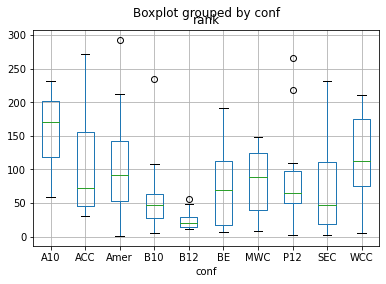

In [ ]:
#data_top10_conf.boxplot(column = 'rank', by = 'conf')

In [55]:
st.header('Player analysis')
st.write("""
###### Let's analyze what influences price the most. We will check how distibution of price varies depending on 
transmission, engine or body type and state
""")
         
#creating options for filter from all teams
team_choice = teams['team'].unique()
make_choice_team1 = st.selectbox('Select team 1:', team_choice)
make_choice_team2 = st.selectbox('Select team 2:', team_choice)

#filtering dataset on chosen team and ...
filtered_team=players[(players['team']==make_choice_team1) | (players['team']==make_choice_team2)]

# Will create histograms with the split by parameter of choice: color, transmission, engine_type, body_type, state

#creating list of options to choose from
list_for_hist=[' bpm', ' obpm', ' dbpm', ' gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']

#creating selectbox
choice_for_hist = st.selectbox('Player Metrics', list_for_hist)

#plotly histogram, where price_usd is split by the choice made in the selectbox
fig3 = px.histogram(filtered_team, x=choice_for_hist, color='team')

#adding tittle
fig3.update_layout(
title="<b> Split of price by {}</b>".format(choice_for_hist))

#embedding into streamlit
st.plotly_chart(fig3)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
#cd git_projects/practicum_sprint4_project
#streamlit run app.py